In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def softmax_simple(x):
    e_x = np.exp(x)
    return e_x / np.sum(e_x)

In [3]:
softmax_simple([1.2, -0.3, 0.6])  # works well for relatively small numbers

array([0.56435262, 0.12592409, 0.30972329])

In [4]:
softmax_simple([100000000.2, -0.3, 0.6])  # ...but is unstable for larger numbers
                                          # (due to e^(large number))

/var/folders/zm/6bl16j950fqf20k8r2fh6xrh0000gn/T/ipykernel_68609/3766344906.py:2: RuntimeWarning: overflow encountered in exp
  e_x = np.exp(x)
/var/folders/zm/6bl16j950fqf20k8r2fh6xrh0000gn/T/ipykernel_68609/3766344906.py:3: RuntimeWarning: invalid value encountered in divide
  return e_x / np.sum(e_x)


array([nan,  0.,  0.])

In [5]:
def softmax_stable(x):
    e_x = np.exp(x - np.max(x))
    return e_x / np.sum(e_x)

In [6]:
softmax_stable([100000000.2, -0.3, 0.6])  # substracting the largest number makes it stable

array([1., 0., 0.])

In [7]:
def softmax_vectorized(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e_x / np.sum(e_x, axis=1, keepdims=True)

'x shape: (100, 4)'

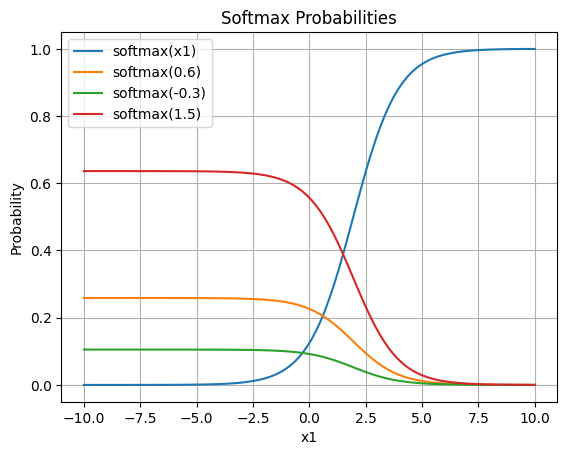

In [8]:
x1 = np.linspace(-10, 10, 100)
x2 = np.full_like(x1, 0.6)
x3 = np.full_like(x1, -0.3)
x4 = np.full_like(x1, 1.5)
x = np.array([x1, x2, x3, x4]).T
display(f"x shape: {x.shape}")
probabilities = softmax_vectorized(x)
# Plot the softmax probabilities
plt.plot(x1, probabilities[:, 0], label='softmax(x1)')
plt.plot(x1, probabilities[:, 1], label='softmax(0.6)')
plt.plot(x1, probabilities[:, 2], label='softmax(-0.3)')
plt.plot(x1, probabilities[:, 3], label='softmax(1.5)')
plt.xlabel('x1')
plt.ylabel('Probability')
plt.legend()
plt.title('Softmax Probabilities')
plt.grid(True)
plt.show()